In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Load the dataset
file_path = 'Phising_Detection_Dataset.csv'  # Update the file path if necessary
dataset = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(dataset.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       662591 non-null  int64  
 1   NumDots          662591 non-null  int64  
 2   UrlLength        662591 non-null  int64  
 3   NumDash          662591 non-null  int64  
 4   AtSymbol         662591 non-null  int64  
 5   IpAddress        662591 non-null  int64  
 6   HttpsInHostname  662591 non-null  int64  
 7   PathLevel        662591 non-null  int64  
 8   PathLength       662591 non-null  int64  
 9   NumNumericChars  662591 non-null  int64  
 10  Phising          630071 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 55.6 MB
None


In [4]:
# Display the first few rows of the dataset
print("\nDataset Head:")
print(dataset.head())



Dataset Head:
   Unnamed: 0  NumDots  UrlLength  NumDash  AtSymbol  IpAddress  \
0           0        3         72        0         0          0   
1           1        3        144        0         0          0   
2           2        3         58        0         0          0   
3           3        3         79        1         0          0   
4           4        3         46        0         0          0   

   HttpsInHostname  PathLevel  PathLength  NumNumericChars  Phising  
0                0          5          44                0      1.0  
1                0          3          16               41      1.0  
2                0          2          24                0      1.0  
3                0          6          50                0      1.0  
4                0          4          29                2      1.0  


In [5]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)



Missing Values in Each Column:
Unnamed: 0             0
NumDots                0
UrlLength              0
NumDash                0
AtSymbol               0
IpAddress              0
HttpsInHostname        0
PathLevel              0
PathLength             0
NumNumericChars        0
Phising            32520
dtype: int64


In [6]:
# Drop rows with missing values in the 'Phising' column
dataset = dataset.dropna(subset=['Phising'])

In [7]:
# Verify that there are no missing values in the 'Phising' column
print("\nMissing Values After Dropping:")
print(dataset.isnull().sum())


Missing Values After Dropping:
Unnamed: 0         0
NumDots            0
UrlLength          0
NumDash            0
AtSymbol           0
IpAddress          0
HttpsInHostname    0
PathLevel          0
PathLength         0
NumNumericChars    0
Phising            0
dtype: int64


In [8]:
# Define features and target variable
features = dataset.drop(['Unnamed: 0', 'Phising'], axis=1)
target = dataset['Phising']

In [9]:
print("\nFeatures:")
print(features.head())


Features:
   NumDots  UrlLength  NumDash  AtSymbol  IpAddress  HttpsInHostname  \
0        3         72        0         0          0                0   
1        3        144        0         0          0                0   
2        3         58        0         0          0                0   
3        3         79        1         0          0                0   
4        3         46        0         0          0                0   

   PathLevel  PathLength  NumNumericChars  
0          5          44                0  
1          3          16               41  
2          2          24                0  
3          6          50                0  
4          4          29                2  


In [10]:
print("\nTarget:")
print(target.head())


Target:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Phising, dtype: float64


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [12]:
print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (504056, 9)
Testing Set Size: (126015, 9)


In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [14]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
print("\nFirst 5 Rows of Scaled Training Features:")
print(X_train_scaled[:5])


First 5 Rows of Scaled Training Features:
[[ 0.55763777 -0.121054   -0.20162767 -0.04282335 -0.03084145 -0.12527416
  -0.51224287 -0.32333873 -0.43544268]
 [-0.77688885 -0.91842559 -0.53209084 -0.04282335 -0.03084145 -0.12527416
  -1.12613585 -0.76021113 -0.43544268]
 [ 9.23206082  4.77392156  0.1288355  -0.04282335 -0.03084145 -0.12527416
   1.94332905  0.04632253  0.2449657 ]
 [-0.77688885 -0.87412717 -0.53209084 -0.04282335 -0.03084145 -0.12527416
  -1.12613585 -0.693      -0.43544268]
 [ 0.55763777 -0.78553032 -0.53209084 -0.04282335 -0.03084145 -0.12527416
  -0.51224287 -0.55857772 -0.43544268]]


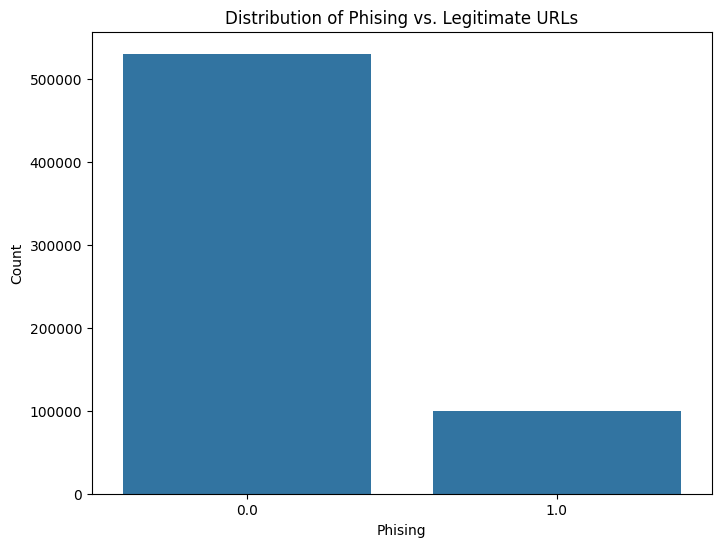

In [16]:
# Visualize the distribution of the target variable (Phising)
plt.figure(figsize=(8, 6))
sns.countplot(x='Phising', data=dataset)
plt.title('Distribution of Phising vs. Legitimate URLs')
plt.xlabel('Phising')
plt.ylabel('Count')
plt.show()

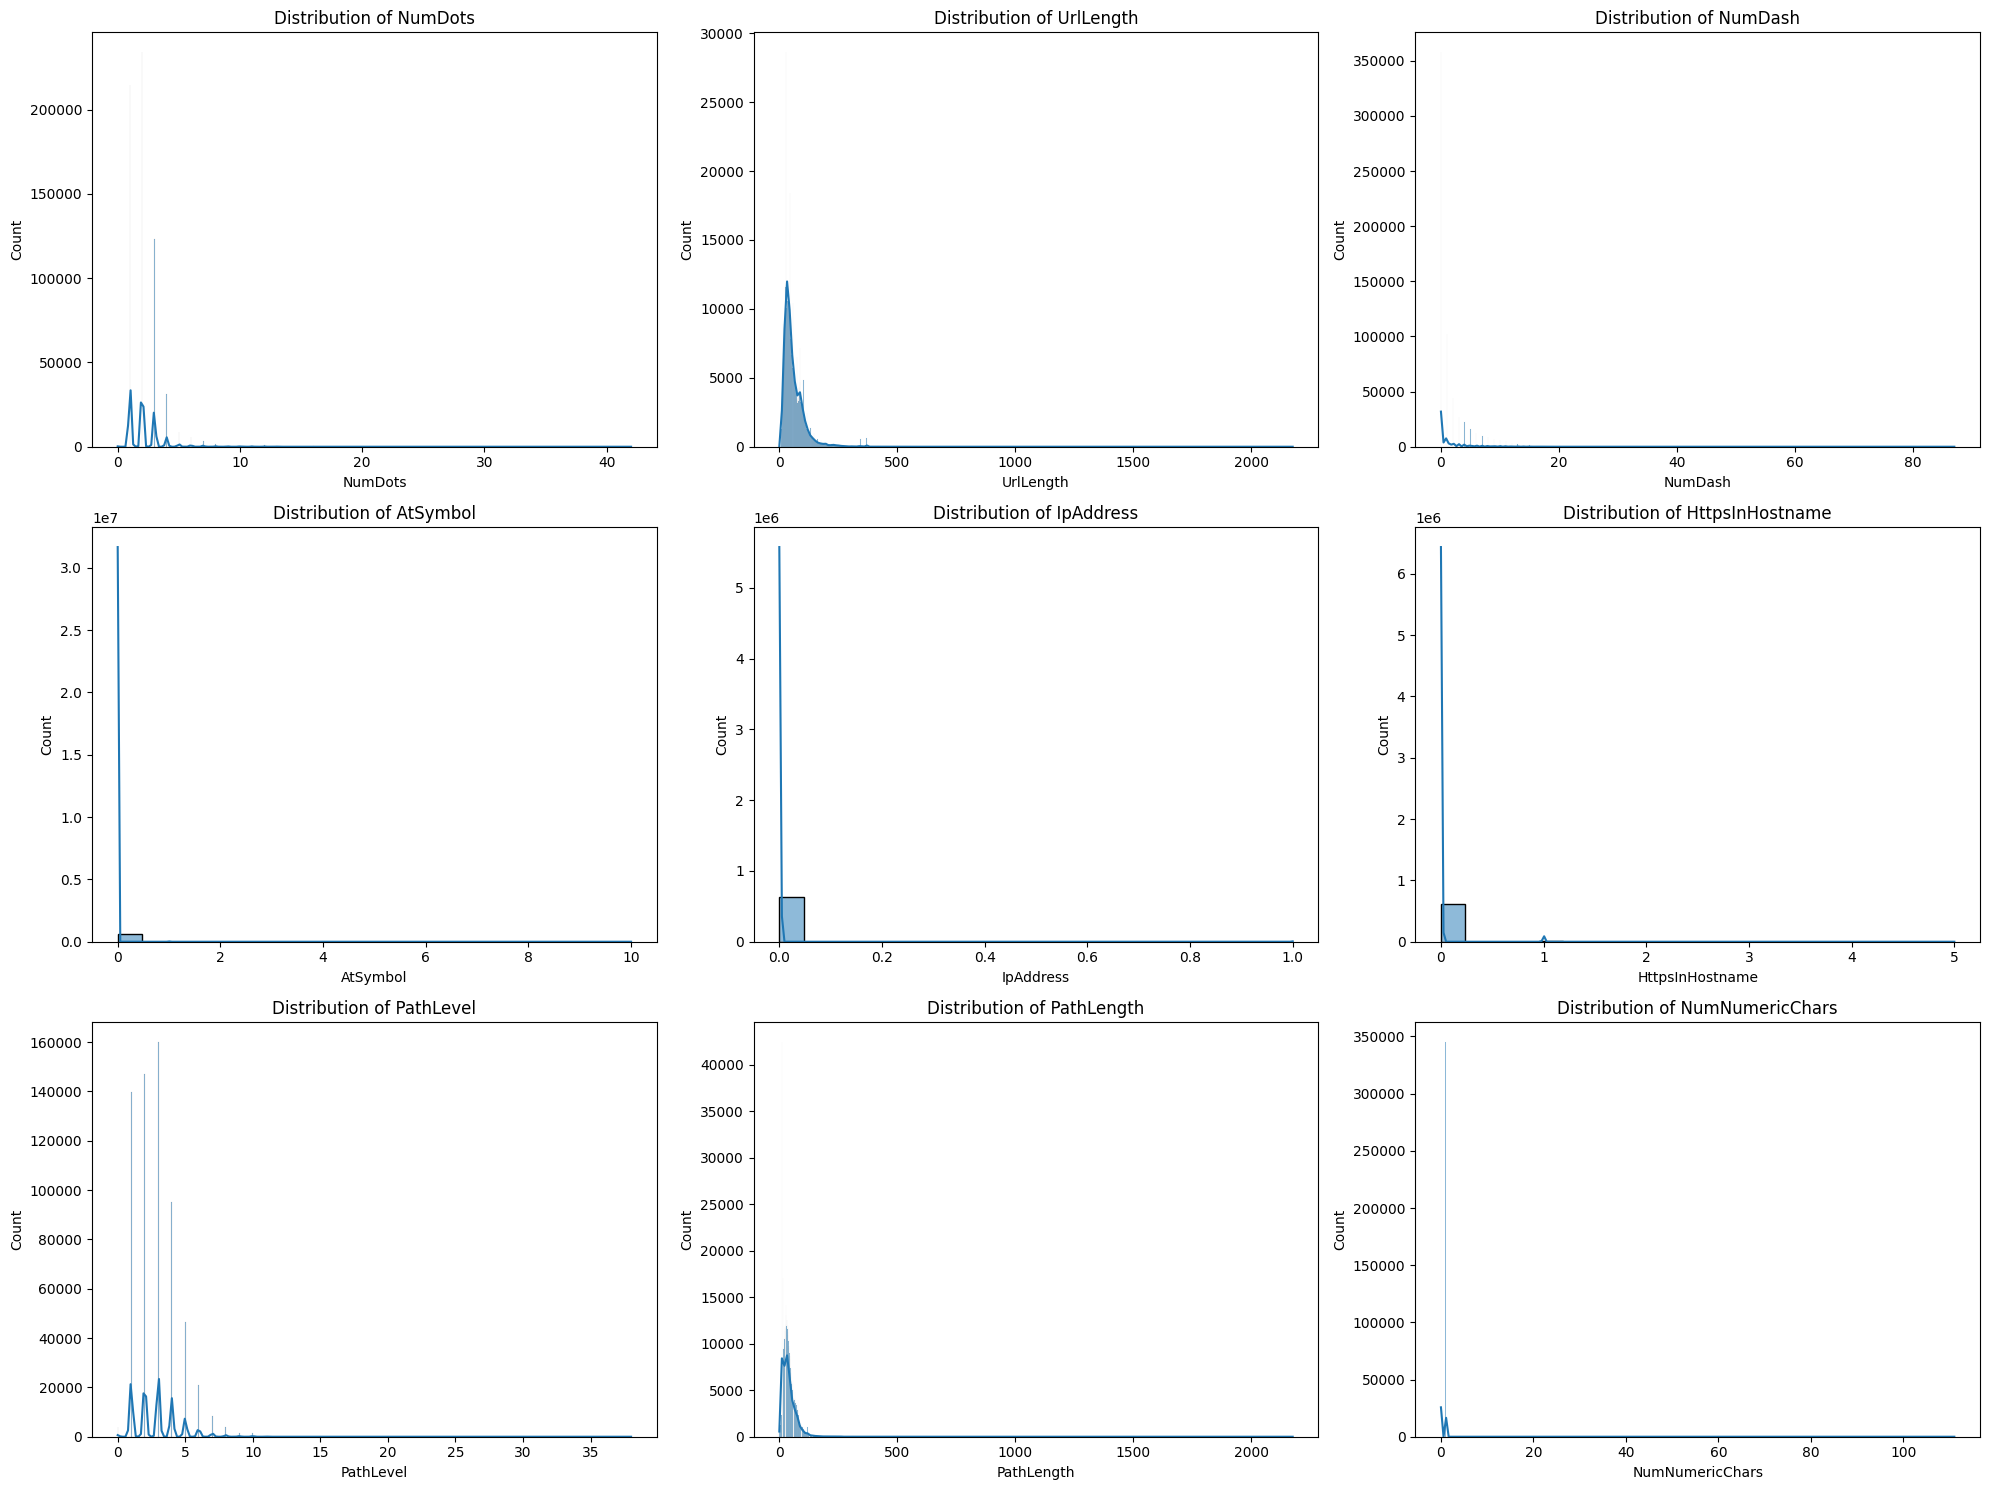

In [17]:
# Visualize the distribution of numerical features
numerical_features = ['NumDots', 'UrlLength', 'NumDash', 'AtSymbol', 'IpAddress', 'HttpsInHostname', 'PathLevel', 'PathLength', 'NumNumericChars']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=dataset, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [18]:
# Compute the correlation matrix
correlation_matrix = dataset[numerical_features + ['Phising']].corr()

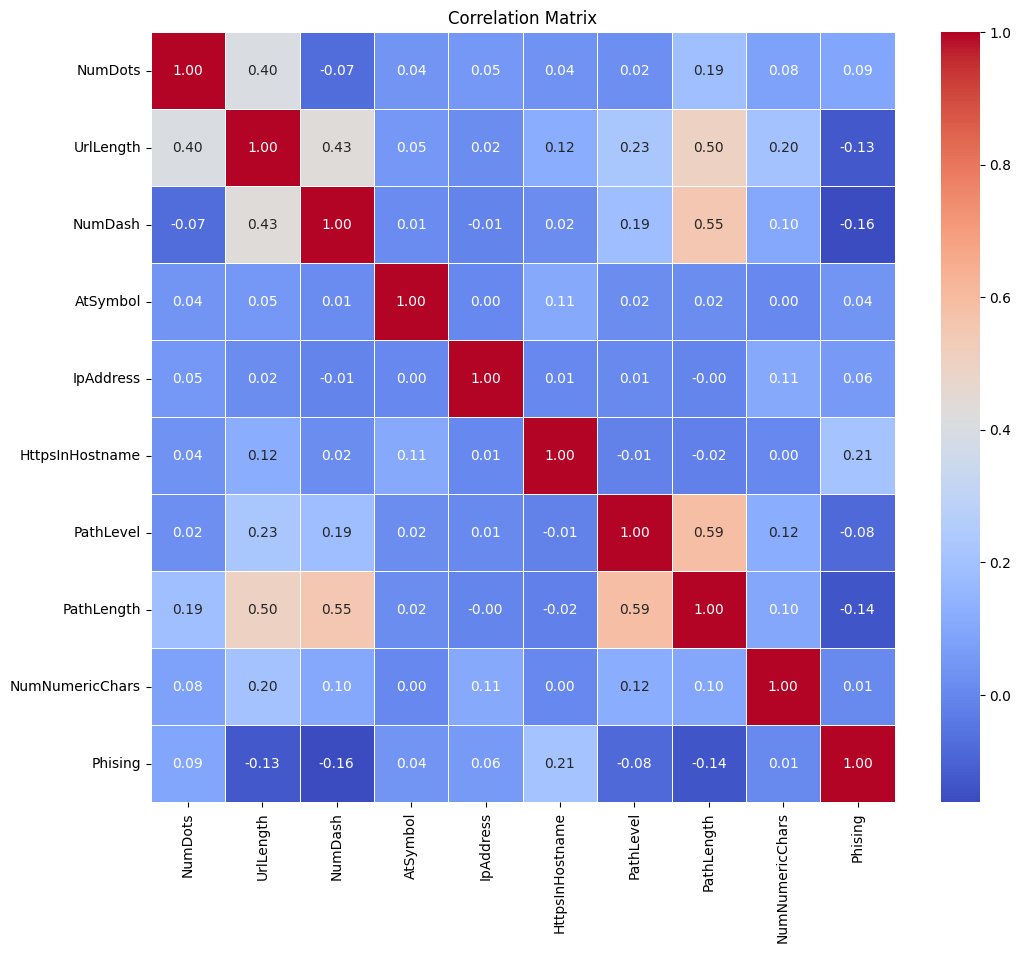

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Logistic Regression Model
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)


In [22]:
# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

In [23]:
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"F1 Score: {log_reg_f1}")

Logistic Regression Performance:
Accuracy: 0.8490338451771614
Precision: 0.7446140035906643
Recall: 0.0824798647708064
F1 Score: 0.1485095336138215


In [24]:
# Random Forest Model
# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [26]:

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

In [27]:
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [28]:
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")


Random Forest Performance:
Accuracy: 0.8911082014045947
Precision: 0.7375148632580262
Recall: 0.4933876901660535
F1 Score: 0.5912421805183199


In [29]:
# Neural Network Model
# Initialize and train the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.8574 - loss: 0.3357 - val_accuracy: 0.8737 - val_loss: 0.2924
Epoch 2/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8691 - loss: 0.3018 - val_accuracy: 0.8763 - val_loss: 0.2850
Epoch 3/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8714 - loss: 0.2967 - val_accuracy: 0.8788 - val_loss: 0.2792
Epoch 4/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8725 - loss: 0.2924 - val_accuracy: 0.8804 - val_loss: 0.2778
Epoch 5/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.8739 - loss: 0.2902 - val_accuracy: 0.8805 - val_loss: 0.2783
Epoch 6/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8752 - loss: 0.2878 - val_accuracy: 0.8814 - val_loss: 0.2765
Epoch 7/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8749 - loss: 0.2875 - val_accuracy: 0.8815 - val_loss: 0.2749
Epoch 8/10
12602/12602 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 

In [31]:
# Predict on the test set
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

3938/3938 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [32]:
# Evaluate the Neural Network model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

In [33]:
print("Neural Network Performance:")
print(f"Accuracy: {nn_accuracy}")
print(f"Precision: {nn_precision}")
print(f"Recall: {nn_recall}")
print(f"F1 Score: {nn_f1}")

Neural Network Performance:
Accuracy: 0.8803713843590049
Precision: 0.7355773726040206
Recall: 0.3911206125087004
F1 Score: 0.5106949268071018


In [35]:
# Feature Importance for Random Forest
feature_importances = rf_clf.feature_importances_
features = X_train.columns

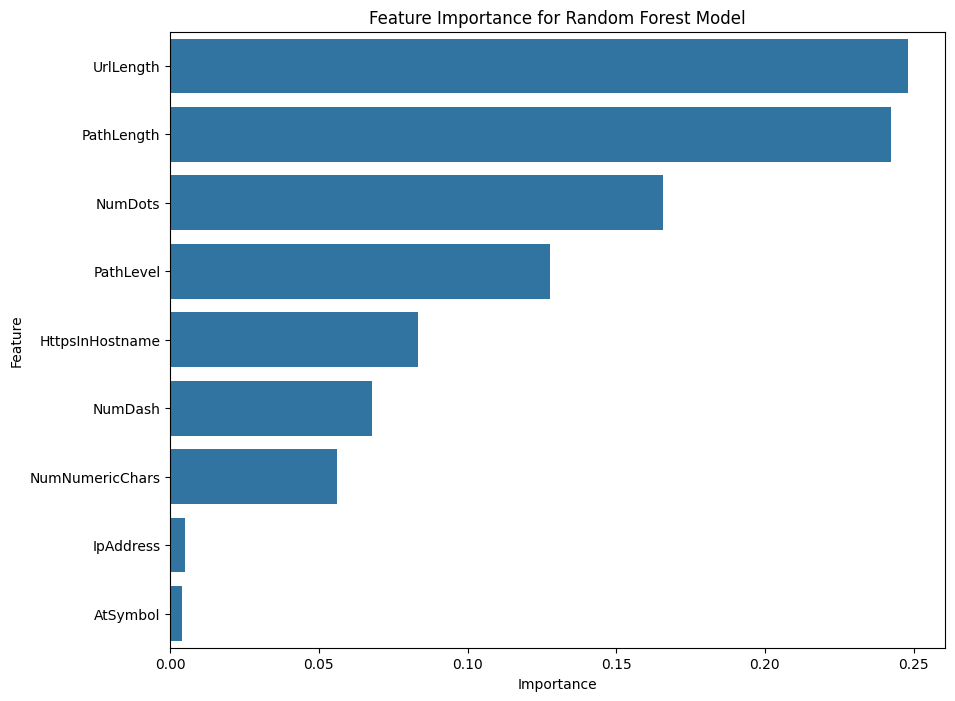

In [36]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest Model')
plt.show()

In [37]:
# Confusion Matrix and Classification Report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)


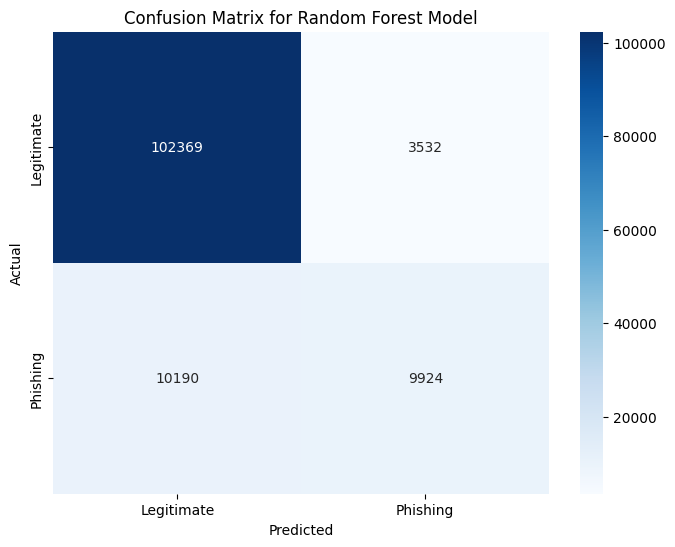

In [38]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [39]:
# Print classification report
class_report = classification_report(y_test, y_pred_rf, target_names=['Legitimate', 'Phishing'])
print("Classification Report for Random Forest Model:")
print(class_report)

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

  Legitimate       0.91      0.97      0.94    105901
    Phishing       0.74      0.49      0.59     20114

    accuracy                           0.89    126015
   macro avg       0.82      0.73      0.76    126015
weighted avg       0.88      0.89      0.88    126015



In [40]:
# Cross-Validation
# Perform cross-validation on the Random Forest model
cross_val_scores = cross_val_score(rf_clf, X_train_scaled, y_train, cv=5, scoring='f1')

print("Cross-Validation F1 Scores for Random Forest Model:")
print(cross_val_scores)
print("Mean Cross-Validation F1 Score:", np.mean(cross_val_scores))

Cross-Validation F1 Scores for Random Forest Model:
[0.5876699  0.59026346 0.58621206 0.58972148 0.59208558]
Mean Cross-Validation F1 Score: 0.5891904968236293


In [42]:
# Plot ROC Curve and Calculate AUC
y_pred_prob_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

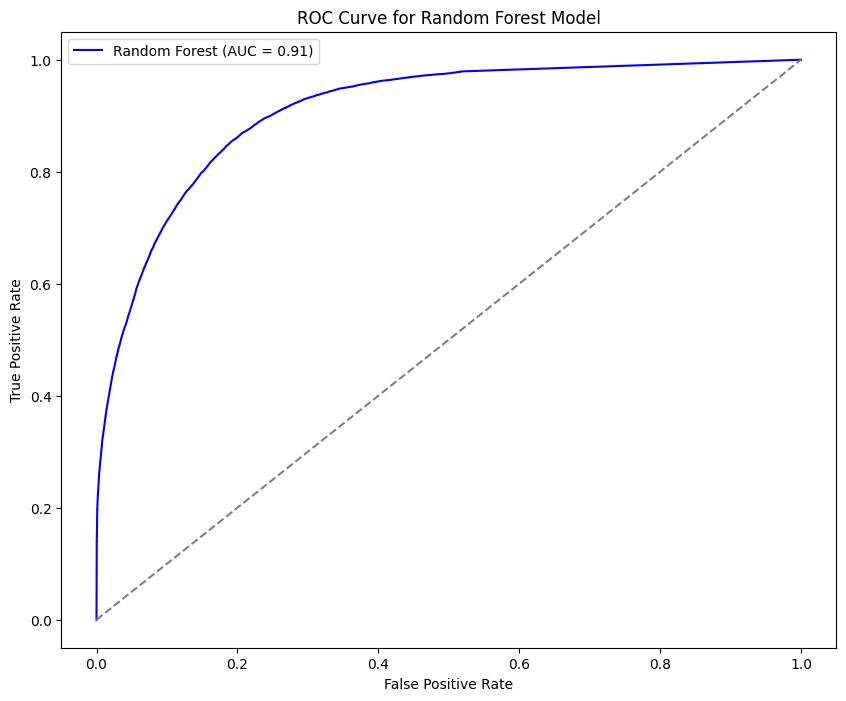

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.show()

In [45]:
print(f"ROC AUC Score for Random Forest Model: {roc_auc:.2f}")


ROC AUC Score for Random Forest Model: 0.91
